# Setup

## Parser Setup

In [1]:
import configparser

file_path = 'config.ini'
config = configparser.ConfigParser()
config.read(file_path)

['config.ini']

## Database and Integratiy Setup

In [2]:
import os

# Change to the parent directory to access the DFVC module
os.chdir('..')
from src import DFVC

# Define constant for database access
DB_DIR = 'data'

# Define constants for preprocessed 1 data access
PRP_S1_DF_NAME = config['database']['prp_data_s1_df_name']
PRP_S1_FILENAME = config['database']['prp_data_s1_filename']
PRP_S1_HASH = config['database']['prp_data_s1_version_hash']

PRP_S1_PATH = os.path.join(DB_DIR, PRP_S1_FILENAME)

## Data Analysis and Visualization Setup

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Integrity Verification and Getting Started with the Data

In [4]:
prp_s1_dfvc = DFVC.load_dfvc_file(PRP_S1_PATH)
prp_s1_dfvc.compare_versions(PRP_S1_HASH)
display(prp_s1_dfvc)

Version integrity verified successfully.


In [5]:
data = prp_s1_dfvc.get_dataframe()

# Data Overview

,quarter,quarter_label,ig_maus,ig_revs,tk_maus,tk_revs
0,2019-03-31,Q1 2019,1160,3255,333,56
1,2019-06-30,Q2 2019,1210,3887,381,65
2,2019-09-30,Q3 2019,1255,4066,439,82
3,2019-12-31,Q4 2019,1300,5016,508,167
4,2020-03-31,Q1 2020,1365,4475,583,347


,quarter,quarter_label,ig_maus,ig_revs,tk_maus,tk_revs
18,2023-09-30,Q3 2023,2145,12736,1616,4241
19,2023-12-31,Q4 2023,2180,15322,1635,4997
20,2024-03-31,Q1 2024,2231,14472,1666,5855
21,2024-06-30,Q2 2024,2250,15638,1685,6922
22,2024-09-30,Q3 2024,2270,16641,1726,7737


shape: (23, 6)


quarter          datetime64[ns]
quarter_label            object
ig_maus                   int64
ig_revs                   int64
tk_maus                   int64
tk_revs                   int64
dtype: object

,ig_maus,ig_revs,tk_maus,tk_revs
count,23.000000,23.000000,23.000000,23.000000
mean,1778.304348,8856.434783,1096.217391,2353.608696
std,370.072774,4045.684208,484.474782,2275.400639
min,1160.000000,3255.000000,333.000000,56.000000
25%,1462.500000,5207.500000,683.500000,708.000000
50%,1845.000000,8037.000000,1112.000000,1628.000000
75%,2100.000000,11323.000000,1568.000000,3467.000000
max,2270.000000,16641.000000,1726.000000,7737.000000


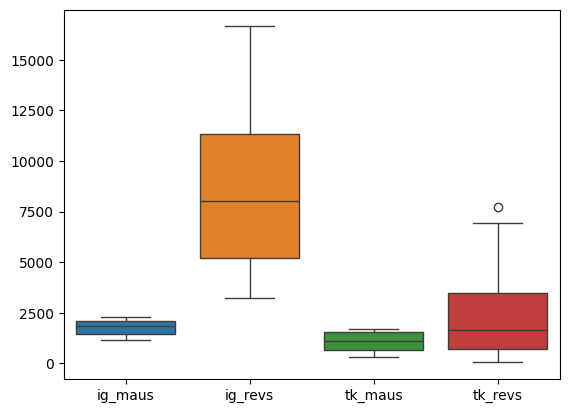

In [17]:
def plot_data_overview_stats(df):
    display(df.head())
    display(df.tail())
    print(f'shape: {df.shape}')
    display(df.dtypes)
    display(df.drop(columns=['quarter']).describe())
    sns.boxplot(df)

plot_data_overview_stats(data)

In [ ]:
sns.lineplot(data=data, x='quarter', y='ig_maus', label='Instagram MAUs')
sns.lineplot(data=data, x='quarter', y='tk_maus', label='TikTok MAUs')

In [ ]:
sns.lineplot(data=data, x='quarter', y='ig_maus', label='Instagram MAUs')

In [ ]:
sns.lineplot(data=data, x='quarter', y='ig_revs', label='Instagram Revenue')
sns.lineplot(data=data, x='quarter', y='tk_revs', label='TikTok Revenue')

In [ ]:
sns.lineplot(data=data, x='quarter', y='ig_revs', label='Instagram Revenue')

In [ ]:
sns.lineplot(data=data, x='quarter', y='tk_revs', label='TikTok Revenue')

In [ ]:
sns.pairplot(data)

In [ ]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_data.corr(), annot=True)

In [ ]:
# regplot
ax = sns.regplot(data=data, x='ig_maus', y='ig_revs', label='Instagram')
ax = sns.regplot(data=data, x='tk_maus', y='tk_revs', label='TikTok')
ax.legend()
ax.set_xlabel('MAUs')
ax.set_ylabel('Revenues')
sns.despine()

## Presupostos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

def avaliar_pressupostos_prophet(data):
    # Verifique se o DataFrame possui as colunas 'ds' e 'y'
    if 'ds' not in data.columns or 'y' not in data.columns:
        raise ValueError("O DataFrame deve conter as colunas 'ds' (datas) e 'y' (valores).")
    
    # Converta a coluna 'ds' para o formato de data
    data['ds'] = pd.to_datetime(data['ds'], errors='coerce')
    if data['ds'].isnull().any():
        raise ValueError("A coluna 'ds' contém valores que não podem ser convertidos para datas.")
    
    # Verifique se há valores ausentes na coluna 'y'
    if data['y'].isnull().any():
        raise ValueError("A coluna 'y' contém valores ausentes.")
    
    # Plotar a série temporal para verificar tendências e sazonalidades
    plt.figure(figsize=(10, 6))
    plt.plot(data['ds'], data['y'])
    plt.title('Série Temporal')
    plt.xlabel('Data')
    plt.ylabel('Valor')
    plt.show()
    
    # Plotar o boxplot para verificar a distribuição dos dados
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data['y'])
    plt.title('Boxplot dos Valores')
    plt.xlabel('Valor')
    plt.show()
    
    # Verificar a decomposição da série temporal para identificar tendências e sazonalidades
    result = seasonal_decompose(data.set_index('ds')['y'], model='additive', period=1)
    result.plot()
    plt.show()
    
    print("Se os gráficos mostrarem tendências e sazonalidades claras, a variável provavelmente atende aos pressupostos do Prophet.")

# Supondo que 'data' seja o DataFrame contendo a série temporal
# Avaliar os pressupostos do Prophet para a coluna 'ig_maus'
data_prophet = data[['quarter', 'ig_maus']].rename(columns={'quarter': 'ds', 'ig_maus': 'y'})
avaliar_pressupostos_prophet(data_prophet)

# Interpetação

## Discussão/interpretação dos resultados MAUs
- correlação linear forte entre as variáveis MAUs e Receita. Apontando possível relação de causa e efeito entre as variáveis devido a MAUs ser um valor que pode ser considerado como um indicador de sucesso do aplicativo.
- apenas a variavel MAUs do instagram não é estacionária, já a MAUs do TikTok é estacionária. Destaque posterior analise dos trimestres 2 e 3 que parecem ser pontos de virada. 
- claras tendência positiva em ambas as variáveis MAUs. Porém a MAUs do TikTok nos ultimos periodos apresenta estabilidade, o que torna uma variável estacionária, apesar de poder aparentar uma tendência positiva constante.
- a série de receita apresenta um pouco de sazonalidade nos dados do Instagram, mas não é muito forte se comparada com as tendências.



## plano definido:
Prophet para MAUs e regressão linear para receita usando as previsões de MAUs ainda faz sentido. Aqui está a justificativa:

Justificativa:
Correlação linear forte entre MAUs e Receita:
Isso indica que o número de MAUs pode ser um bom preditor para as receitas. Usar as previsões de MAUs como feature para prever receitas é uma abordagem coerente.

Nenhuma das variáveis é estacionária:
Isso reforça o uso do Prophet, que é projetado para lidar com séries não estacionárias. No caso de MAUs, você pode seguir com Prophet sem necessidade de transformações.

Clara tendência positiva:
O Prophet modela bem a tendência (ele tem componentes de tendência embutidos no modelo). Já para a receita, a regressão linear é adequada quando existe uma relação linear clara entre as variáveis, como você observou.

Sazonalidade na receita é moderada:
Como a sazonalidade na receita é relativamente fraca comparada à tendência, a regressão linear pode ainda ser apropriada, especialmente se o foco principal for prever a tendência de crescimento da receita com base nos MAUs.

MAUs sem sazonalidade:
O fato de MAUs não apresentar sazonalidade torna a escolha por Prophet ainda mais válida, pois o Prophet pode captar bem a tendência sem complicações adicionais. Uma análise mais profunda de sazonalidade poderia ser feita, mas, por ora, é razoável seguir com o Prophet.

Veredicto:
Prophet para prever MAUs continua fazendo sentido, pois ele modela bem a tendência e lida com a não estacionariedade.
Regressão linear para prever receitas usando as previsões de MAUs também continua válida, dada a forte correlação linear entre as variáveis e a ausência de uma sazonalidade forte que pudesse exigir modelos mais complexos.

### Próximos Passos:
1. Modelar as previsões de MAUs com Prophet;
2. Usar as previsões de MAUs como feature para um modelo de regressão linear para prever as receitas.